In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Union
from sklearn.preprocessing import LabelEncoder
import matplotlib.font_manager as fm
import matplotlib
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 1. 데이터 로드
airbnb_df = pd.read_csv('../data/Airbnb_Open_Data.csv',low_memory=False)

In [37]:
# 2. 데이터 구조 및 기초 통계 확인
airbnb_df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [38]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [39]:
def drop_column(df,column_list):
    for column_name in column_list:
        df = df.drop(column_name,axis=1)
    return df

In [40]:
columns = [
    "host name",
    "country",
    "country code",
    "calculated host listings count",
    "license",
    "house_rules",
    "last review",
    "instant_bookable",
    "long",
    "lat",
    # 'neighbourhood',
    # "neighbourhood group",
    "NAME",
    "host id",
    "host_identity_verified"
]

airbnb_df = drop_column(airbnb_df,columns)
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   102599 non-null  int64  
 1   neighbourhood group  102570 non-null  object 
 2   neighbourhood        102583 non-null  object 
 3   cancellation_policy  102523 non-null  object 
 4   room type            102599 non-null  object 
 5   Construction year    102385 non-null  float64
 6   price                102352 non-null  object 
 7   service fee          102326 non-null  object 
 8   minimum nights       102190 non-null  float64
 9   number of reviews    102416 non-null  float64
 10  reviews per month    86720 non-null   float64
 11  review rate number   102273 non-null  float64
 12  availability 365     102151 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 10.2+ MB


In [41]:
airbnb_df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [42]:
airbnb_df['price'] = airbnb_df['price'].replace(r'[\$,]', '', regex=True).astype(float)
airbnb_df['service fee'] = airbnb_df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)

In [43]:
airbnb_df.describe()

,id,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
count,1.025990e+05,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102151.000000
mean,2.914623e+07,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,141.133254
std,1.625751e+07,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,135.435024
min,1.001254e+06,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,-10.000000
25%,1.508581e+07,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,3.000000
50%,2.913660e+07,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,96.000000
75%,4.320120e+07,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,269.000000
max,5.736742e+07,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,3677.000000


In [44]:
airbnb_df.isnull().sum()

id                         0
neighbourhood group       29
neighbourhood             16
cancellation_policy       76
room type                  0
Construction year        214
price                    247
service fee              273
minimum nights           409
number of reviews        183
reviews per month      15879
review rate number       326
availability 365         448
dtype: int64

In [45]:
def fillna(df,columns,default=0):
    for column in columns:
        df[column] = df[column].fillna(default)
    return df

def dropna(df,column_list):
    df = df.dropna(subset=column_list,axis=0)
    return df
def change_type(df,columns,type):
    for column in columns:
        df[column] = df[column].astype(type)
    return df
def cleaned_data(df: pd.DataFrame, columns: List[str], value: Union[int, float, List[Union[int, float]]], compare_type: str) -> pd.DataFrame:
    if not columns:
        raise ValueError("컬럼 리스트가 비어있습니다.")
    
    if compare_type == "over":
        if not isinstance(value, (int, float)):
            raise TypeError("value가 숫자가 아닙니다.")
        for column in columns:
            df = df[df[column] < value]
    elif compare_type == "under":
        if not isinstance(value, (int, float)):
            raise TypeError("value가 숫자가 아닙니다.")
        for column in columns:
            df = df[df[column] > value]
    elif compare_type == "between":
        if not isinstance(value, (list, tuple)) or len(value) != 2:
            raise TypeError("value가 리스트 또는 튜플이 아니거나 길이가 2가 아닙니다.")
        lower, upper = value[0], value[1]
        for column in columns:
            df = df[(df[column] > lower) & (df[column] < upper)]
    else:
        raise ValueError(f"Invalid compare_type: {compare_type}. Use 'over', 'under', or 'between'")
    return df


In [46]:
airbnb_df.describe()

,id,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
count,1.025990e+05,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102151.000000
mean,2.914623e+07,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,141.133254
std,1.625751e+07,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,135.435024
min,1.001254e+06,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,-10.000000
25%,1.508581e+07,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,3.000000
50%,2.913660e+07,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,96.000000
75%,4.320120e+07,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,269.000000
max,5.736742e+07,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,3677.000000


In [47]:
# room type 별 평균 가격 계산
room_type_avg_price = airbnb_df.groupby('room type')['price'].mean()
# 데이터 전처리
airbnb_df = fillna(airbnb_df,['price'],airbnb_df['room type'].map(room_type_avg_price))
airbnb_df = cleaned_data(airbnb_df,['price'],[50,1000],'between')
airbnb_df = cleaned_data(airbnb_df,['availability 365'],[100,365],'between')
airbnb_df = cleaned_data(airbnb_df,['number of reviews'],100,'over')
airbnb_df = cleaned_data(airbnb_df,['minimum nights'],0,'under')
airbnb_df = fillna(airbnb_df,['minimum nights'],1)
airbnb_df = fillna(airbnb_df,['service fee','number of reviews','review rate number'])
airbnb_df = fillna(airbnb_df,['reviews per month'],airbnb_df['review rate number']/12)
airbnb_df = fillna(airbnb_df,['availability 365'],1)
airbnb_df = dropna(airbnb_df,['Construction year','neighbourhood group','cancellation_policy'])
airbnb_df = change_type(airbnb_df,['availability 365','number of reviews','Construction year'],int)
airbnb_df['availability 365'] = round((365 - airbnb_df['availability 365']) / 365, 2)
airbnb_df['price'] = airbnb_df['price'].astype(int) * 1400
airbnb_df['service fee'] = airbnb_df['service fee'].astype(int) *1400

In [48]:
airbnb_df['availability 365'].max()

np.float64(0.72)

In [49]:
airbnb_df.info()
airbnb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 33200 entries, 0 to 102596
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33200 non-null  int64  
 1   neighbourhood group  33200 non-null  object 
 2   neighbourhood        33198 non-null  object 
 3   cancellation_policy  33200 non-null  object 
 4   room type            33200 non-null  object 
 5   Construction year    33200 non-null  int64  
 6   price                33200 non-null  int64  
 7   service fee          33200 non-null  int64  
 8   minimum nights       33200 non-null  float64
 9   number of reviews    33200 non-null  int64  
 10  reviews per month    33200 non-null  float64
 11  review rate number   33200 non-null  float64
 12  availability 365     33200 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 3.5+ MB


id                     0
neighbourhood group    0
neighbourhood          2
cancellation_policy    0
room type              0
Construction year      0
price                  0
service fee            0
minimum nights         0
number of reviews      0
reviews per month      0
review rate number     0
availability 365       0
dtype: int64

In [50]:
airbnb_df.describe()

,id,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
count,3.320000e+04,33200.000000,3.320000e+04,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000
mean,2.766448e+07,2012.394066,7.323211e+05,146018.228916,10.305602,18.945602,1.158741,3.289428,0.321317
std,1.597559e+07,5.767813,3.823302e+05,76859.332943,27.238271,24.278695,1.421363,1.292769,0.222981
min,1.001254e+06,2003.000000,7.140000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.318770e+07,2007.000000,4.004000e+05,79800.000000,2.000000,2.000000,0.240000,2.000000,0.110000
50%,2.784256e+07,2012.000000,7.322000e+05,145600.000000,3.000000,8.000000,0.540000,3.000000,0.300000
75%,4.012213e+07,2017.000000,1.061200e+06,212800.000000,7.000000,27.000000,1.650000,4.000000,0.520000
max,5.736024e+07,2022.000000,1.398600e+06,334600.000000,2645.000000,99.000000,27.950000,5.000000,0.720000


In [51]:
# Label Encoder 초기화
le_neighbourhood = LabelEncoder()
le_cancellation = LabelEncoder()
le_room_type = LabelEncoder()

# 범주형 데이터에 Label Encoding 적용

airbnb_df['neighbourhood group'] = le_neighbourhood.fit_transform(airbnb_df['neighbourhood group'])
airbnb_df['cancellation_policy'] = le_cancellation.fit_transform(airbnb_df['cancellation_policy'])
airbnb_df['room type'] = le_room_type.fit_transform(airbnb_df['room type'])
airbnb_df['cancellation_policy'] = 2 - airbnb_df['cancellation_policy']


In [52]:
# airbnb_df.to_csv('../data/airbnb_data_new.csv',index=False)

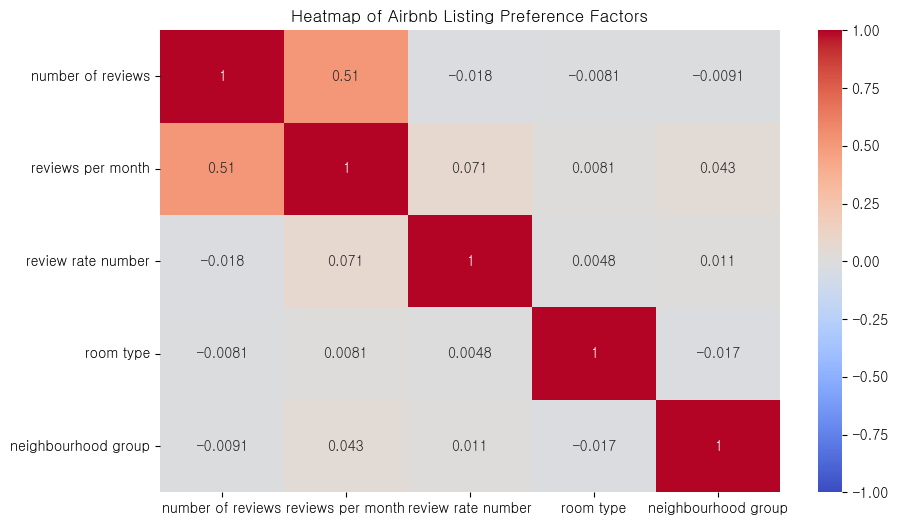

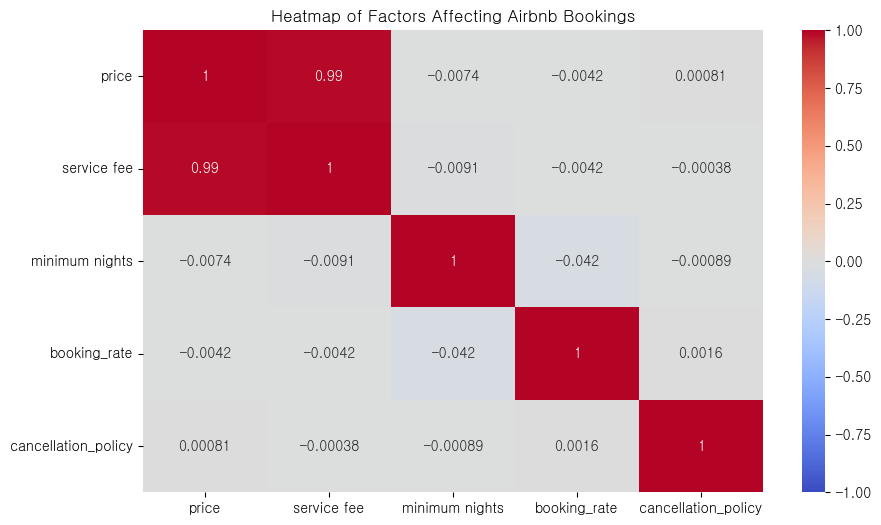

In [53]:
# 1. 숙소 선호도 관련 변수
preference_columns = [
    'number of reviews', 'reviews per month', 'review rate number',
    'room type', 'neighbourhood group'
]
df_preference = airbnb_df[preference_columns]

# 상관관계 행렬 계산
pref_corr_matrix = df_preference.corr()

# 첫 번째 히트맵: 숙소 선호도
plt.figure(figsize=(10, 6))
sns.heatmap(pref_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Heatmap of Airbnb Listing Preference Factors")
plt.show()
airbnb_df = airbnb_df.rename(columns={'availability 365': 'booking_rate'})
# 2. 예약에 영향을 주는 요소 관련 변수
booking_columns = [
    'price', 'service fee', 'minimum nights', 'booking_rate',
    'cancellation_policy'
]
df_booking = airbnb_df[booking_columns]

# 상관관계 행렬 계산
booking_corr_matrix = df_booking.corr()

# 두 번째 히트맵: 예약에 영향을 주는 요소
plt.figure(figsize=(10, 6))
sns.heatmap(booking_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Heatmap of Factors Affecting Airbnb Bookings")
plt.show()

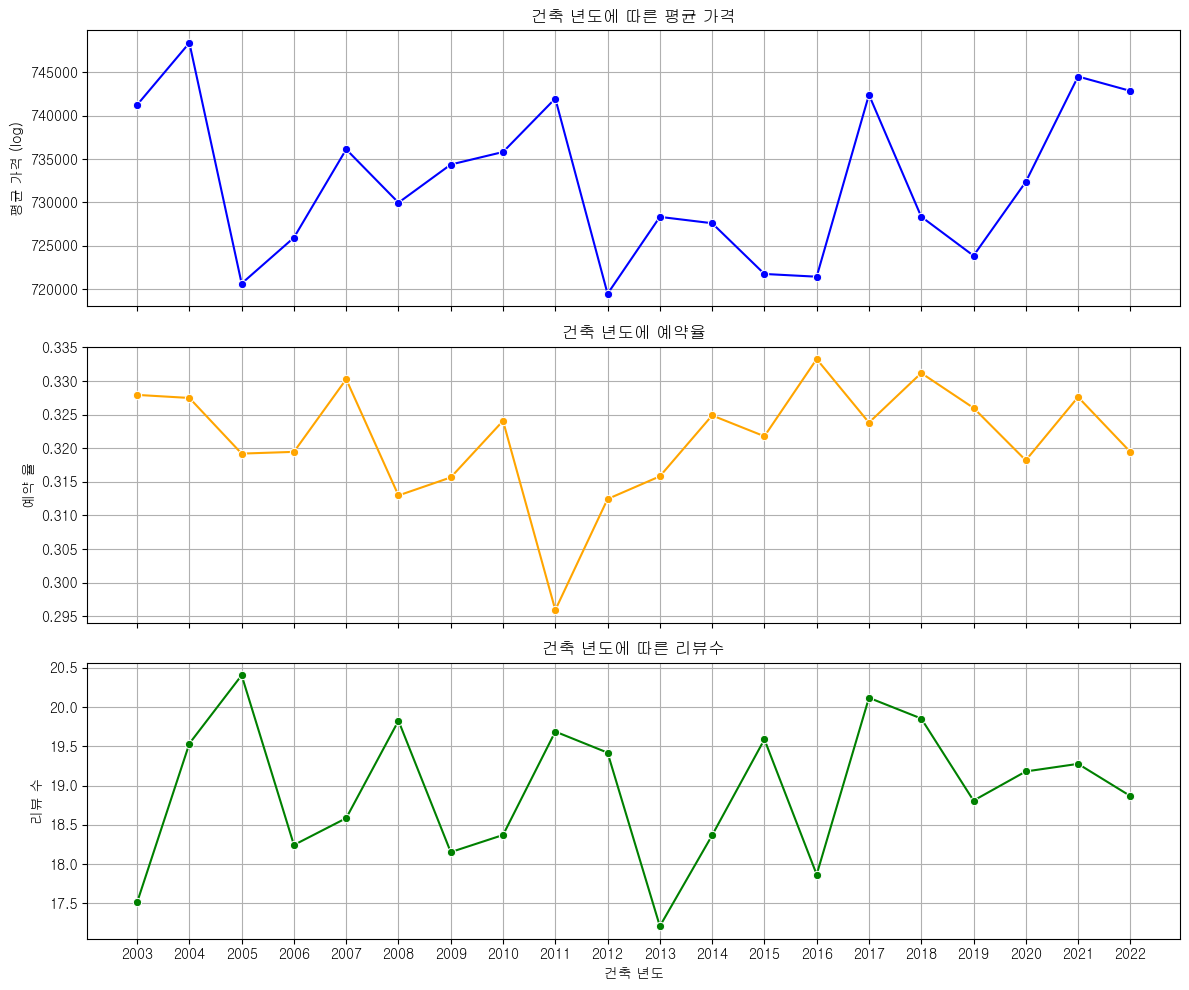

In [54]:
# Construction year별 평균값 계산
yearly_data = airbnb_df.groupby('Construction year').agg({
    'price': 'mean',
    'booking_rate': 'mean',
    'number of reviews': 'mean'
}).reset_index()

# 서브플롯 생성
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
min_year = int(yearly_data['Construction year'].min())
max_year = int(yearly_data['Construction year'].max())
# 레이아웃 조정
plt.tight_layout()
for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(min_year, max_year + 1))

# 첫 번째 그래프: 가격
sns.lineplot(x='Construction year', y='price', data=yearly_data, ax=ax1, color='blue', marker='o')
ax1.set_title('건축 년도에 따른 평균 가격')
ax1.set_ylabel('평균 가격 (log)')
ax1.grid(True)

# 두 번째 그래프: 리뷰 수
sns.lineplot(x='Construction year', y='number of reviews', data=yearly_data, ax=ax3, color='green', marker='o')
ax3.set_title('건축 년도에 따른 리뷰수')
ax3.set_xlabel('건축 년도')
ax3.set_ylabel('리뷰 수')
ax3.grid(True)

# 세 번째 그래프: 예약율
sns.lineplot(x='Construction year', y='booking_rate', data=yearly_data, ax=ax2, color='orange', marker='o')
ax2.set_title('건축 년도에 예약율')
ax2.set_ylabel('예약 율')
ax2.grid(True)


# 레이아웃 조정
plt.tight_layout()
plt.show()

C:\Users\njy01\AppData\Local\Temp\ipykernel_8100\806090993.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (year, nb_group, room_type, booking_rate_bucket), group in df.groupby(['Construction year', 'neighbourhood group', 'room type', 'booking_rate_bucket']):


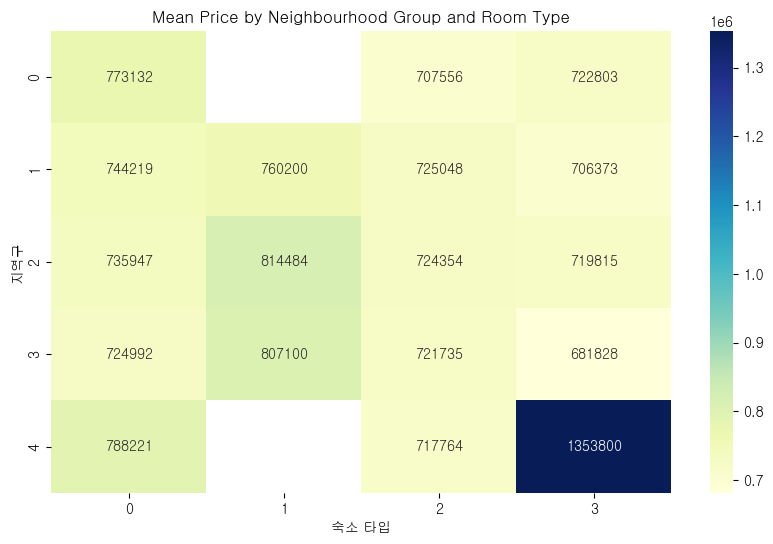

In [55]:
# 이상치 제거 함수
# neighbourhood group, room type, Construction year별 평균 계산
def calculate_grouped_stats_with_outliers(df, use_median=False, iqr_factor=1.5):
    import numpy as np
    import pandas as pd
    
    df['log_price'] = np.log1p(df['price'])  # 로그 변환
    
    # booking_rate가 0~1 사이의 값인 경우 10% 단위 구간 생성
    bins = np.arange(0, 1.1, 0.1)  # 0, 0.1, 0.2, ... 1.0
    labels = [f"{int(b*100)}-{int((b+0.1)*100)}%" for b in bins[:-1]]
    df['booking_rate_bucket'] = pd.cut(df['booking_rate'], bins=bins, labels=labels, right=False)
    
    grouped_stats = []
    
    # groupby에 booking_rate_bucket 추가
    for (year, nb_group, room_type, booking_rate_bucket), group in df.groupby(['Construction year', 'neighbourhood group', 'room type', 'booking_rate_bucket']):
        
        if use_median:
            price_stat = group['price'].median()
        else:
            price_stat = group['price'].mean()
        
        group_mean = {
            'Construction year': year,
            'neighbourhood group': nb_group,
            'room type': room_type,
            'booking_rate_bucket': booking_rate_bucket,
            'price': price_stat,
            'booking_rate': group['booking_rate'].mean()
        }
        grouped_stats.append(group_mean)
    
    return pd.DataFrame(grouped_stats)


# 데이터에 적용
grouped_data = calculate_grouped_stats_with_outliers(airbnb_df, use_median=False, iqr_factor=2.0)


# 히트맵: 지역과 숙소 종류별 평균 가격
pivot_table = grouped_data.pivot_table(values='price', index='neighbourhood group', 
                                       columns='room type', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('숙소 타입')
plt.ylabel('지역구')
plt.title('Mean Price by Neighbourhood Group and Room Type')
plt.show()

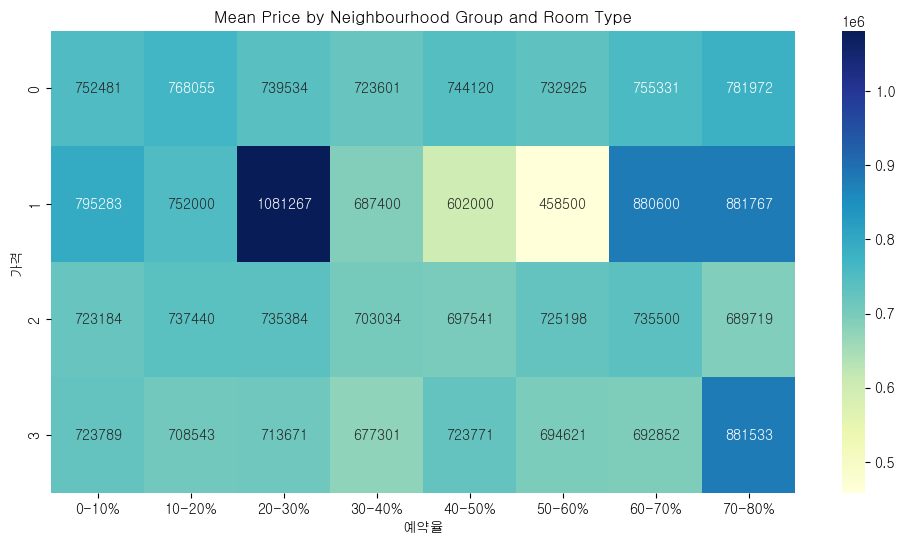

In [56]:
# 히트맵: neighbourhood group과 room type별 평균 가격
pivot_table = grouped_data.pivot_table(values='price', index='room type', 
                                       columns='booking_rate_bucket', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('예약율')
plt.ylabel('가격')
plt.title('Mean Price by Neighbourhood Group and Room Type')
plt.show()

C:\Users\njy01\AppData\Local\Temp\ipykernel_8100\128862564.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = airbnb_df.pivot_table(index='review rate number', values='price',


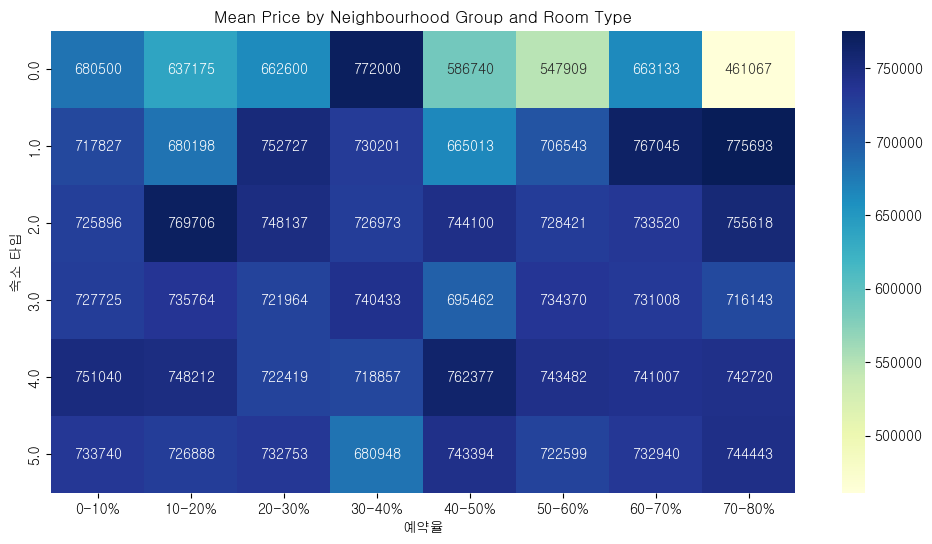

In [57]:
# 숙소 타입과 평점에 다른 예약율
pivot_table = airbnb_df.pivot_table(index='review rate number', values='price', 
                                       columns='booking_rate_bucket', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('예약율')
plt.ylabel('숙소 타입')
plt.title('Mean Price by Neighbourhood Group and Room Type')
plt.show()

cancellation_policy
1    11095
0    11091
2    11014
Name: count, dtype: int64


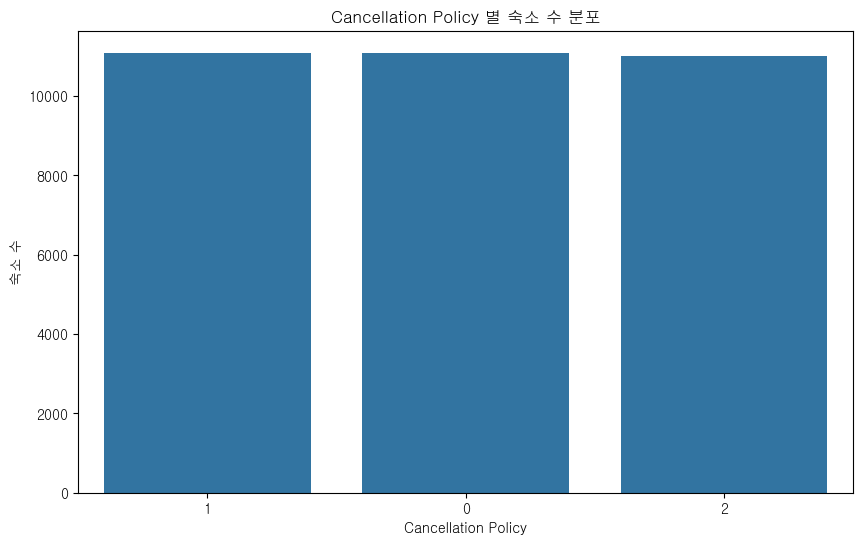

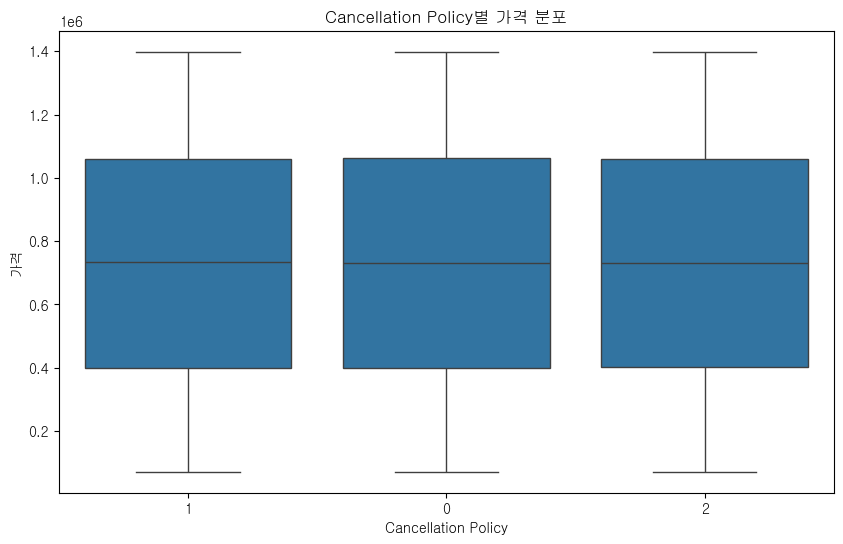

In [58]:
# cancellation_policy 값의 분포 확인
print(airbnb_df['cancellation_policy'].value_counts())

# 1. cancellation_policy별 숙소 수 분포 (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=airbnb_df, x='cancellation_policy', 
              order=airbnb_df['cancellation_policy'].value_counts().index)
plt.title('Cancellation Policy 별 숙소 수 분포')
plt.xlabel('Cancellation Policy')
plt.ylabel('숙소 수')
plt.show()

# 2. cancellation_policy별 가격 분포 (Boxplot)
# price 컬럼이 존재하는 경우 활용 (컬럼명이 다르다면 수정하세요)
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_df, x='cancellation_policy', y='price', 
            order=airbnb_df['cancellation_policy'].value_counts().index)
plt.title('Cancellation Policy별 가격 분포')
plt.xlabel('Cancellation Policy')
plt.ylabel('가격')
plt.show()

# 추가: 다른 변수(예: 리뷰 수, 예약률 등)와의 관계도 분석 가능
# 예를 들어, 'number_of_reviews' 컬럼이 있다면 아래와 같이 시각화할 수 있습니다.
if 'number_of_reviews' in airbnb_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=airbnb_df, x='cancellation_policy', y='number_of_reviews', 
                order=airbnb_df['cancellation_policy'].value_counts().index)
    plt.title('Cancellation Policy별 리뷰 수 분포')
    plt.xlabel('Cancellation Policy')
    plt.ylabel('리뷰 수')
    plt.show()


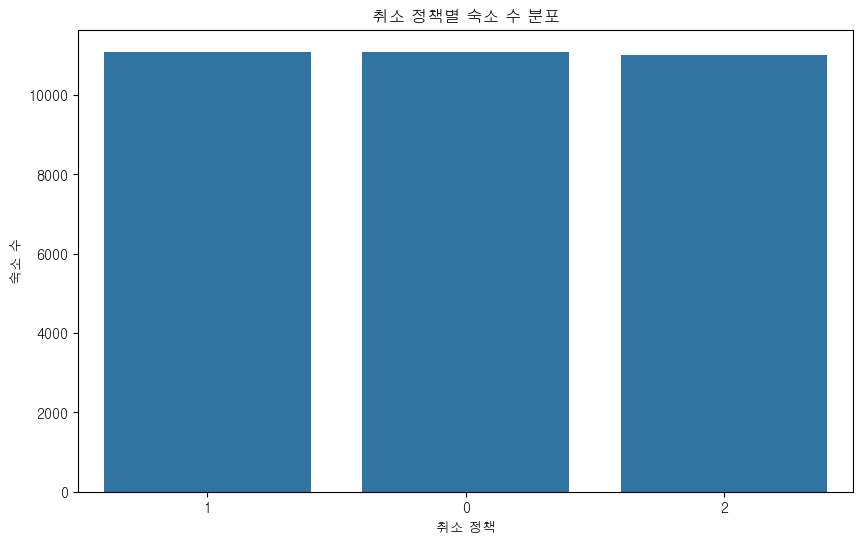

In [59]:
# 1. 취소 정책별 숙소 수 분포 (Countplot)
plt.figure(figsize=(10, 6))
order = airbnb_df['cancellation_policy'].value_counts().index
sns.countplot(data=airbnb_df, x='cancellation_policy', order=order)
plt.title('취소 정책별 숙소 수 분포')
plt.xlabel('취소 정책')
plt.ylabel('숙소 수')
plt.show()


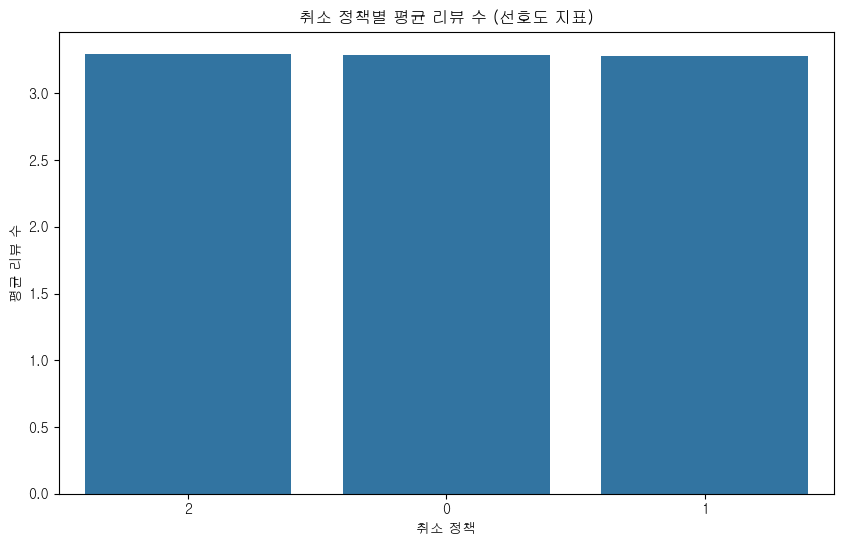

In [60]:
avg_reviews = airbnb_df.groupby('cancellation_policy')['review rate number'].mean().reset_index()
avg_reviews = avg_reviews.sort_values(by='review rate number', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_reviews, x='cancellation_policy', y='review rate number', 
            order=avg_reviews['cancellation_policy'])
plt.title('취소 정책별 평균 리뷰 수 (선호도 지표)')
plt.xlabel('취소 정책')
plt.ylabel('평균 리뷰 수')
plt.show()

### 1.숙소 유형별 선호도 파악 (Countplot)
- 그래프 설명:

    - 이 그래프는 데이터셋 내에 존재하는 숙소 유형(예: 전체 집/아파트, 개인실, 다인실 등)의 개수를 시각적으로 보여줍니다.

- 실제 관계 및 인사이트:

    - 비중 확인:
만약 '전체 집/아파트'가 압도적으로 많다면, 이는 호스트들이 개인 공간을 제공하는 형태로 숙소를 운영하는 경향이 강하다는 것을 의미합니다.
반대로 '개인실'이나 '다인실'의 비중이 높다면, 예산을 중시하는 여행객들이 많거나 도심 내 짧은 체류를 선호한다는 해석이 가능합니다.
시장 구조 파악:
시장의 숙소 공급 구조를 이해함으로써, 향후 고객층(예: 가족 단위, 1인 여행객, 그룹 여행객)에 따른 마케팅 전략을 세울 때 참고할 수 있습니다.

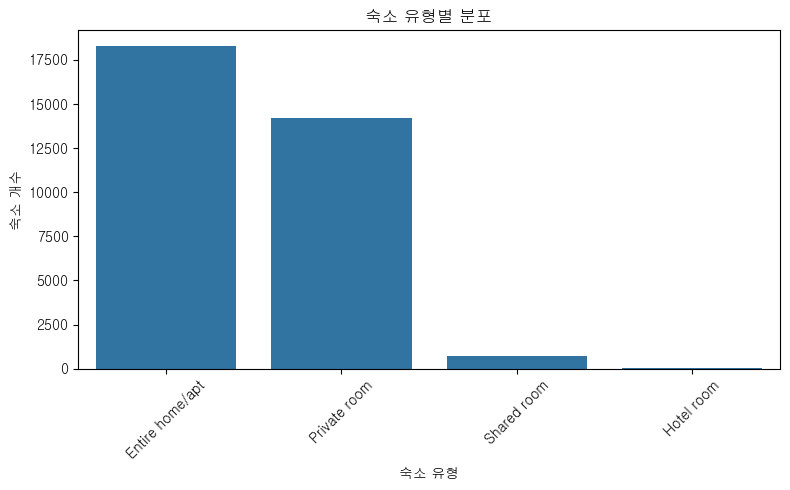

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# room type 범주 매핑
category_mapping = {
    0: 'Entire home/apt',
    1: 'Hotel room',
    2: 'Private room',
    3: 'Shared room'
}

# 매핑 적용
# 원본 'room type' 컬럼은 그대로 두고, 별도 범주 컬럼을 생성합니다.
airbnb_df['room_type_category'] = airbnb_df['room type'].map(category_mapping)

# 5. 시각화: 숙소 유형별 분포
plt.figure(figsize=(8, 5))

# countplot에 들어갈 순서를 데이터의 빈도순으로 자동 설정
room_order = airbnb_df['room_type_category'].value_counts().index

sns.countplot(data=airbnb_df, x='room_type_category', order=room_order)
plt.title('숙소 유형별 분포')
plt.xlabel('숙소 유형')
plt.ylabel('숙소 개수')

# 범주 라벨이 겹치지 않도록 회전
plt.xticks(rotation=45)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()


### 2.가격과 리뷰 수의 관계 (산점도, room_type별 구분)
- 그래프 설명:
    - 이 산점도는 각 숙소의 가격과 리뷰 수를 좌표로 나타내며, room_type에 따라 색상으로 구분합니다.

- 실제 관계 및 인사이트:

    - 가격대와 리뷰 활동:
가격이 낮은 숙소와 높은 숙소 각각에서 리뷰 수가 어떻게 분포하는지를 확인할 수 있습니다. 예를 들어, 저렴한 숙소의 경우 가격 경쟁력 덕분에 예약이 잘 이루어져 리뷰 수가 많을 수 있지만, 반대로 가격이 높으면 예약 건수가 적어 리뷰 수가 적을 가능성이 있습니다.
    - 숙소 유형에 따른 차이:
동일한 가격대 내에서도 전체 집/아파트와 개인실 간에 리뷰 수의 차이가 있다면, 고객들이 특정 숙소 유형에 대해 더 만족하거나 덜 만족하는 경향이 있음을 시사합니다.
    - 고객 피드백:
리뷰 수는 숙소의 인기도 또는 이용 빈도를 대리할 수 있습니다. 리뷰가 많은 숙소는 실제로 많은 예약이 이루어졌음을 나타내며, 이때 가격이 어느 정도 역할을 하는지 확인할 수 있습니다.

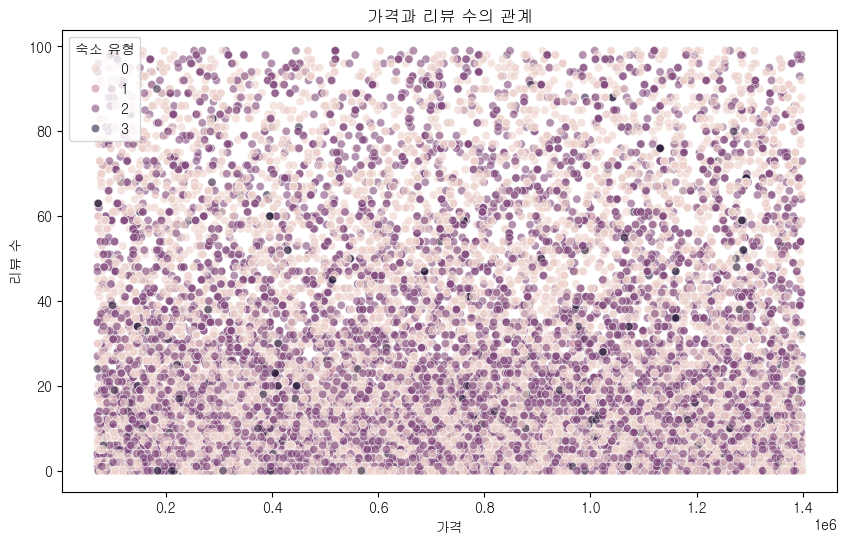

In [62]:
if 'price' in airbnb_df.columns and 'number of reviews' in airbnb_df.columns:
    plt.figure(figsize=(10, 6))
    if 'room type' in airbnb_df.columns:
        sns.scatterplot(data=airbnb_df, x='price', y='number of reviews', 
                        hue='room type', alpha=0.6)
    else:
        sns.scatterplot(data=airbnb_df, x='price', y='number of reviews', alpha=0.6)
    plt.title('가격과 리뷰 수의 관계')
    plt.xlabel('가격')
    plt.ylabel('리뷰 수')
    plt.legend(title='숙소 유형')
    plt.show()

### 3.예약 가능일수와 리뷰 점수의 관계 (산점도, room_type별 구분)
- 그래프 설명:
    - 이 그래프는 숙소의 연간 예약 가능일수(availability_365)와 리뷰 점수(review_scores_rating) 사이의 관계를 나타내며, room_type에 따라 색상을 달리 표시합니다.

- 실제 관계 및 인사이트:

    - 운영 전략의 영향:
예약 가능일수가 높다는 것은 해당 숙소가 연중 거의 언제든 예약 가능한 상태임을 의미합니다. 그러나 이와 동시에 리뷰 점수가 낮다면, 예약은 잘 되지만 고객 만족도에는 문제가 있을 수 있음을 시사합니다.
반면, 예약 가능일수가 적은 숙소는 인기나 예약 집중 기간에 따라 리뷰 점수가 높을 수도 있는데, 이는 고급 숙소나 특정 기간에 집중적으로 운영되는 숙소의 특징일 수 있습니다.
    - 숙소 관리 및 품질:
숙소 유형별로 살펴보면, 예를 들어 전체 집/아파트는 예약 가능일수가 넓은 반면 개인실은 예약 상황에 따라 다르게 나타날 수 있습니다. 이는 운영 방식이나 관리 품질 차이를 반영할 수 있습니다.
    - 고객 만족도와 운영 효율:
이 관계를 통해 숙소의 예약 전략(연중 예약 가능 vs. 특정 시즌 집중 운영)과 고객 만족도 사이의 균형을 어떻게 맞추고 있는지 분석할 수 있습니다.

In [71]:
if 'review rate number' in airbnb_df.columns and 'availability 365' in airbnb_df.columns:
    plt.figure(figsize=(10, 6))
    if 'room type' in airbnb_df.columns:
        sns.scatterplot(data=airbnb_df, x='availability 365', y='review rate number', 
                        hue='room type', alpha=0.6)
    else:
        sns.scatterplot(data=airbnb_df, x='availability 365', y='review rate number', alpha=0.6)
    plt.title('예약 가능일수와 리뷰 점수의 관계')
    plt.xlabel('연간 예약 가능일수')
    plt.ylabel('리뷰 점수')
    plt.legend(title='숙소 유형')
    plt.show()

### 4.최소 숙박일수와 가격의 관계 (산점도, room_type별 구분)
- 그래프 설명:
    - 이 산점도는 숙소의 최소 숙박일수(minimum_nights)와 가격 사이의 관계를 보여주며, room_type에 따른 구분을 통해 각 범주의 특성을 파악할 수 있습니다.

- 실제 관계 및 인사이트:

    - 숙박 정책과 가격 전략:
일반적으로, 최소 숙박일수가 짧은 숙소는 단기 여행객을 대상으로 하여 단가가 다소 높거나 경쟁적인 가격을 제시할 수 있습니다. 반대로 최소 숙박일수가 긴 숙소는 장기 투숙을 전제로 하여 가격 구조가 다르게 형성될 수 있습니다.
    - 숙소 유형별 차이:
예를 들어, 전체 집/아파트는 가족 단위나 그룹 예약을 목표로 최소 숙박일수를 높게 설정하는 반면, 개인실은 단기 숙박을 허용하여 가격 차이가 발생할 수 있습니다.
    - 시장 수요 반영:
최소 숙박일수와 가격의 관계를 통해, 특정 숙소 유형이 어떤 고객층(예: 비즈니스 여행객 vs. 관광객)에게 더 어필하는지, 그리고 그에 따른 가격 전략이 어떻게 설정되어 있는지를 유추할 수 있습니다.

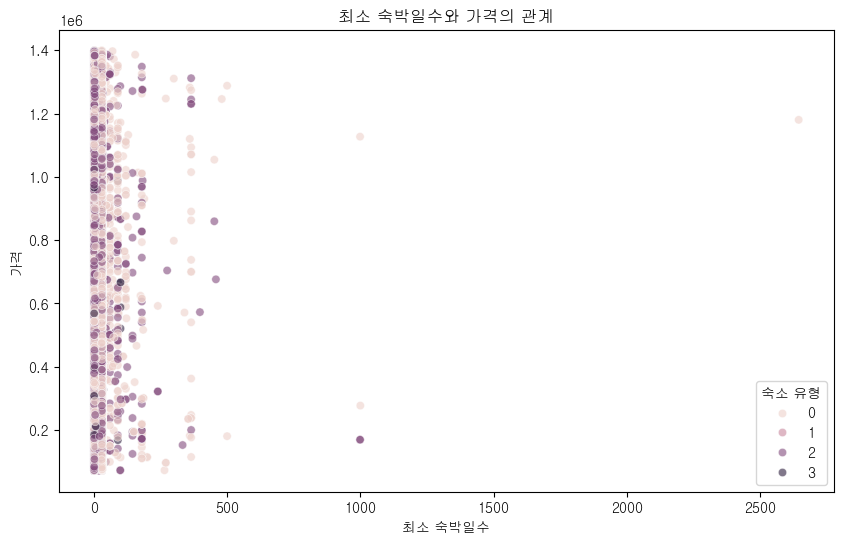

In [64]:

if 'minimum nights' in airbnb_df.columns and 'price' in airbnb_df.columns:
    plt.figure(figsize=(10, 6))
    if 'room type' in airbnb_df.columns:
        sns.scatterplot(data=airbnb_df, x='minimum nights', y='price', 
                        hue='room type', alpha=0.6)
    else:
        sns.scatterplot(data=airbnb_df, x='minimum nights', y='price', alpha=0.6)
    plt.title('최소 숙박일수와 가격의 관계')
    plt.xlabel('최소 숙박일수')
    plt.ylabel('가격')
    plt.legend(title='숙소 유형')
    plt.show()

### 5.변수 간 상관관계 (히트맵)
- 그래프 설명:
    - 이 히트맵은 가격, 리뷰 수, 리뷰 점수, 최소 숙박일수, 예약 가능일수 등 주요 변수들 간의 선형 상관관계를 수치와 색상으로 나타냅니다.

- 실제 관계 및 인사이트:

    - 상관관계 강도 파악:
변수 간의 상관계수(예: 0.7 이상의 강한 양의 상관관계, -0.7 이하의 강한 음의 상관관계 등)를 통해 어떤 요소들이 서로 밀접하게 연결되어 있는지를 알 수 있습니다.
    - 가격과 최소 숙박일수:
만약 가격과 최소 숙박일수 사이에 강한 양의 상관관계가 있다면, 가격이 높은 숙소일수록 최소 숙박일수가 긴 경향이 있음을 의미합니다. 이는 고급 숙소나 장기 투숙을 선호하는 숙소의 운영 전략일 수 있습니다.
    - 리뷰 수와 리뷰 점수:
리뷰 수와 리뷰 점수 사이의 관계가 약하거나 음의 상관관계를 보인다면, 리뷰가 많다고 해서 반드시 숙소 품질이 우수하다는 것을 보장하지 않는다는 점을 시사합니다. 이는 리뷰가 단순 예약 건수를 반영할 수도 있음을 의미합니다.
    - 예약 가능일수와 리뷰 점수:
이 두 변수 간의 관계는 운영 전략과 고객 만족도 사이의 균형을 나타낼 수 있습니다. 예를 들어, 예약 가능일수가 높지만 리뷰 점수가 낮다면, 숙소가 많이 공개되어 예약은 잘 되나 서비스 품질 개선이 필요하다는 인사이트를 제공할 수 있습니다.
    - 종합적 인사이트 도출:
전체적으로, 히트맵을 통해 각 변수들이 상호 작용하는 방식과 그 강도를 파악하면, 숙소 예약에 영향을 미치는 핵심 요소들이 무엇인지, 그리고 어떤 요소들이 서로 보완 혹은 상쇄되는지를 이해할 수 있습니다.

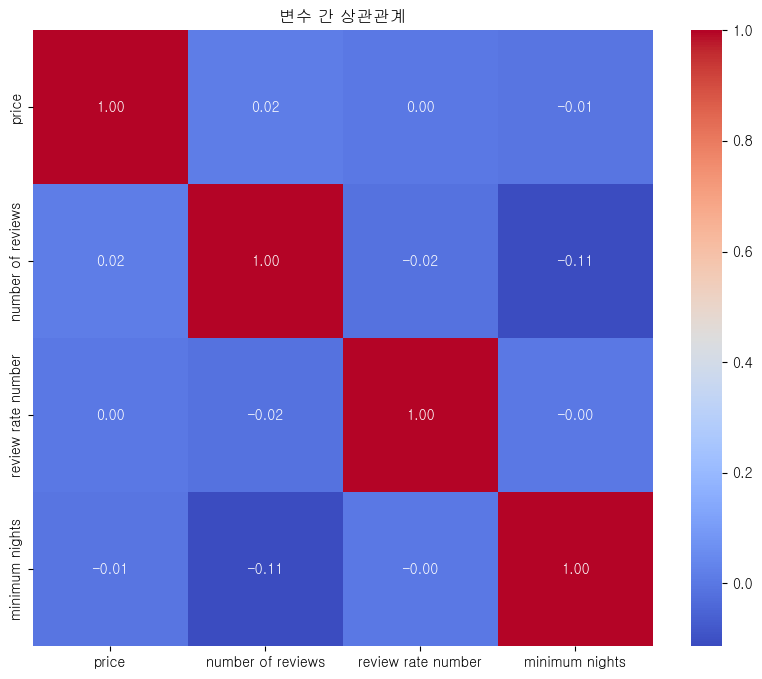

In [65]:
cols = []
for col in ['price', 'number of reviews', 'review rate number', 'minimum nights', 'availability 365']:
    if col in airbnb_df.columns:
        cols.append(col)
if len(cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = airbnb_df[cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('변수 간 상관관계')
    plt.show()

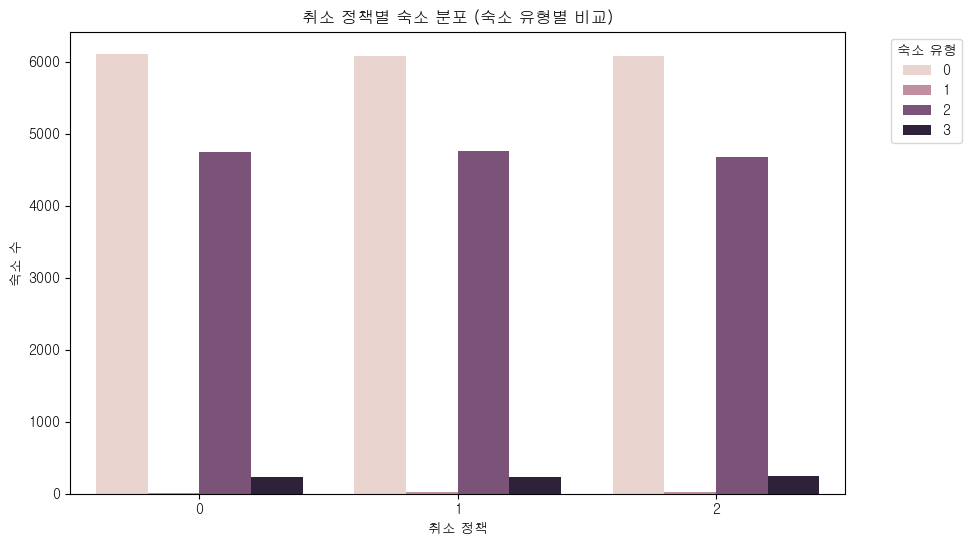

In [66]:
# (1) 취소 정책별 숙소 분포: 숙소 유형(room_type) 별로 분포를 비교
plt.figure(figsize=(10, 6))
if 'room type' in airbnb_df.columns:
    sns.countplot(data=airbnb_df, x='cancellation_policy', hue='room type')
    plt.legend(title='숙소 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    sns.countplot(data=airbnb_df, x='cancellation_policy')
plt.title('취소 정책별 숙소 분포 (숙소 유형별 비교)')
plt.xlabel('취소 정책')
plt.ylabel('숙소 수')
plt.show()

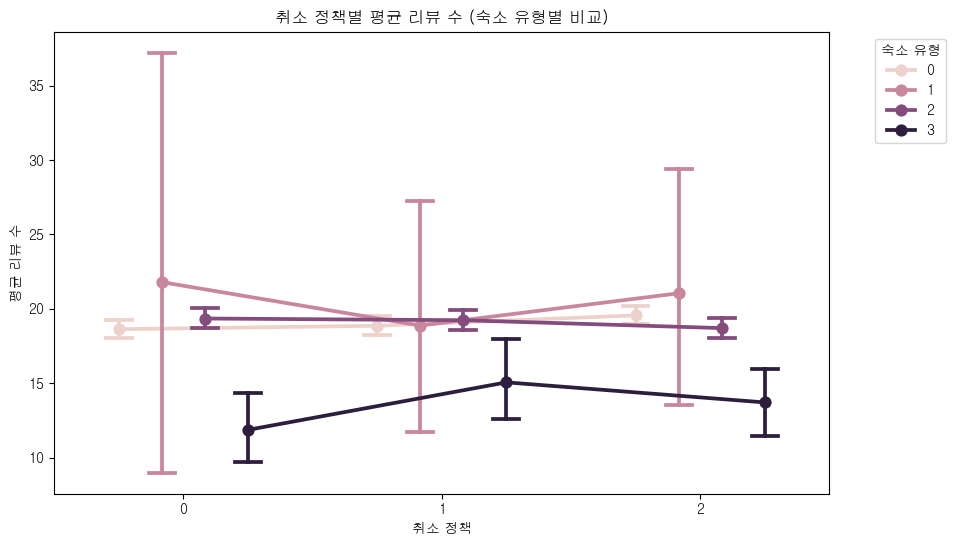

In [67]:
# (2) 취소 정책별 평균 리뷰 수: Pointplot을 이용해 숙소 유형별 평균 리뷰 수 비교
if 'number of reviews' in airbnb_df.columns:
    plt.figure(figsize=(10, 6))
    if 'room type' in airbnb_df.columns:
        sns.pointplot(data=airbnb_df, x='cancellation_policy', y='number of reviews', hue='room type',
                      dodge=0.5, markers="o", capsize=0.1)
        plt.legend(title='숙소 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.pointplot(data=airbnb_df, x='cancellation_policy', y='number of reviews', markers="o", capsize=0.1)
    plt.title('취소 정책별 평균 리뷰 수 (숙소 유형별 비교)')
    plt.xlabel('취소 정책')
    plt.ylabel('평균 리뷰 수')
    plt.show()


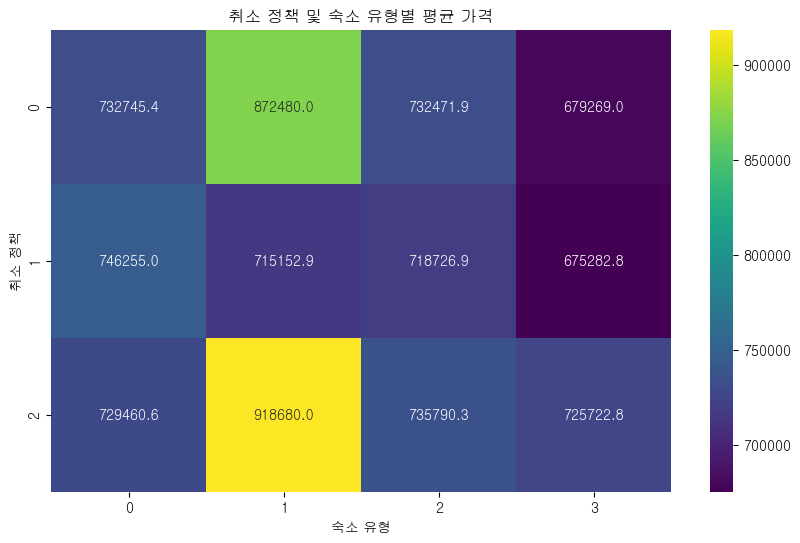

In [68]:
# (3) 추가 인사이트: 취소 정책과 숙소 유형별 평균 가격 히트맵
if 'price' in airbnb_df.columns and 'room type' in airbnb_df.columns:
    pivot_table = airbnb_df.pivot_table(values='price', index='cancellation_policy', columns='room type', aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis')
    plt.title('취소 정책 및 숙소 유형별 평균 가격')
    plt.xlabel('숙소 유형')
    plt.ylabel('취소 정책')
    plt.show()